# Baku House Price

##  Understanding the Problem
### Goal and key question.

* **What factors do house prices depend on?**
* **In which region are prices higher?**
* **Average prices by region?**

## Data Collection and Exploration
### Data format: 

* **CSV**

### Data Information:
This data consists of information that affects the price, such as the selling price of houses in Baku city and their location, whether they are renovated or not, whether they are located in a new building or an old building, and the area of ​​the house. The data has 9 columns and 39,302 rows.

### Columns:
* **Unnamed: 0**: This column indicates the index of the data. It does not have a null value and is of numeric data type. (This column has been deleted)
* **Price**: This column shows the price of houses. It is of numeric data type and does not have null values.
* **Location**: This column shows the area in which the houses are located. It is of the object data type and does not have null values.
* **Rooms**: This column shows the number of rooms in the houses. It is of numeric data type and does not have null values.
* **Square**: This column shows the area of ​​the houses in square meters. It is of float data type and does not contain null values.
* **Floor**: This column shows the floor of the houses. It is of type object data and does not have null values.
* **Building_Type**: This column indicates whether the houses are in a new or old building. It is of object data type and does not have null values.
* **Renovation_Status**: This column shows whether the houses are renovated or not and whether they are being renovated again. It is of object data type and does not have null values.
* **Property_Deed**: This column indicates whether the houses are property documents. It is of the object data type and does not have null values.
* **Mortgage**: This column indicates whether the houses have mortgages. It is of object data type and does not have null values.
* **Region**: This column shows which region the houses are in. It is of object data type and does not have null values.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/mamma/OneDrive/Masaüstü/BakuApartmentData.csv')

In [7]:
df.head()

,Unnamed: 0,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage
0,0,284000,Azadlıq Prospekti m.,3,140.0,5/12,1,1,1,1
1,1,355000,Şah İsmayıl Xətai m.,3,135.0,19/20,1,1,1,1
2,2,755000,Səbail r.,4,210.0,7/18,1,1,1,1
3,3,245000,Elmlər Akademiyası m.,3,86.0,8/10,1,1,1,1
4,4,350000,Elmlər Akademiyası m.,4,174.0,12/15,1,1,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39302 entries, 0 to 39301
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        39302 non-null  int64  
 1   price             39302 non-null  int64  
 2   location          39302 non-null  object 
 3   rooms             39302 non-null  int64  
 4   square            39302 non-null  float64
 5   floor             39302 non-null  object 
 6   new_building      39302 non-null  int64  
 7   has_repair        39302 non-null  int64  
 8   has_bill_of_sale  39302 non-null  int64  
 9   has_mortgage      39302 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 3.0+ MB


In [19]:
df.describe()

,Price,Rooms,Square
count,3.930200e+04,39302.000000,39302.000000
mean,2.322323e+05,2.813648,106.039311
std,1.827754e+05,0.914880,59.856534
min,9.600000e+03,1.000000,12.000000
25%,1.350000e+05,2.000000,65.000000
50%,1.870000e+05,3.000000,94.000000
75%,2.770000e+05,3.000000,130.000000
max,8.075000e+06,20.000000,1600.000000


## Data Cleaning and Data Manipulation

As you can see below, the data does not have null values, but there are outlier values. In addition, at this stage, I deleted unnecessary columns, added new columns for better analysis, and changed the names and values ​​of some existing columns to make them more understandable and better.

### Deleting columns, adding new columns, changing column names, and changing values ​​in some columns.

In [17]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('has_mortgage', axis=1, inplace=True)

In [19]:
region = {'Azadlıq Prospekti m.': 'Binəqədi r.', 'Şah İsmayıl Xətai m.': 'Xətai r.', 'Səbail r.': 'Səbail r.',
    'Elmlər Akademiyası m.': 'Yasamal r.', 'Nizami m.': 'Nəsimi r.', 'Ağ şəhər q.': 'Xətai r.',
    'İnşaatçılar m.': 'Yasamal r.', 'Qara Qarayev m.': 'Nizami r.', 'Həzi Aslanov m.': 'Xətai r.',
    'Yasamal r.': 'Yasamal r.', 'Əhmədli m.': 'Xətai r.', 'Koroğlu m.': 'Nərimanov r.', 'Memar Əcəmi m.': 'Nəsimi r.',
    'Gənclik m.': 'Nərimanov r.', 'Nərimanov r.': 'Nərimanov r.', 'Yeni Yasamal q.': 'Yasamal r.', '8 Noyabr m.': 'Binəqədi r.',
    '20 Yanvar m.': 'Yasamal r.', 'Nəsimi m.': 'Nəsimi r.', '7-ci mikrorayon q.': 'Binəqədi r.', '28 May m.': 'Nəsimi r.',
    'Binəqədi r.': 'Binəqədi r.', 'Bayıl q.': 'Səbail r.', 'Avtovağzal m.': 'Binəqədi r.', 'Nəriman Nərimanov m.': 'Nərimanov r.',
    'Xətai r.': 'Xətai r.', 'Nəsimi r.': 'Nəsimi r.', 'Binəqədi q.': 'Binəqədi r.', '9-cu mikrorayon q.': 'Binəqədi r.',
    'Əhmədli q.': 'Xətai r.', 'Bakıxanov q.': 'Sabunçu r.', 'Qaraçuxur q.': 'Suraxanı r.', 'Neftçilər m.': 'Nizami r.',
    'Badamdar q.': 'Səbail r.', 'Sabunçu r.': 'Sabunçu r.', 'Həzi Aslanov q.': 'Xətai r.', 'Xalqlar Dostluğu m.': 'Nizami r.',
    'Suraxanı r.': 'Suraxanı r.', 'Nizami r.': 'Nizami r.', 'Hövsan q.': 'Suraxanı r.', 'Masazır q.': 'Abşeron r.',
    '8-ci mikrorayon q.': 'Binəqədi r.', '4-cü mikrorayon q.': 'Binəqədi r.', 'İçəri Şəhər m.': 'Səbail r.',
    'Yeni Günəşli q.': 'Xətai r.', 'Yasamal q.': 'Yasamal r.', 'Dərnəgül m.': 'Binəqədi r.', '1-ci mikrorayon q.': 'Binəqədi r.',
    'Məmmədli q.': 'Sabunçu r.', 'Kubinka q.': 'Nəsimi r.', 'Nardaran q.': 'Sabunçu r.', 'Mehdiabad q.': 'Abşeron r.',
    'Lökbatan q.': 'Qaradağ r.', 'Sahil m.': 'Səbail r.', 'Biləcəri q.': 'Binəqədi r.', 'Köhnə Günəşli q.': 'Xətai r.',
    'Kürdəxanı q.': 'Sabunçu r.', 'Bakmil m.': 'Nərimanov r.', '8-ci kilometr q.': 'Nizami r.', 'Yeni Ramana q.': 'Sabunçu r.',
    'Ceyranbatan q.': 'Abşeron r.', 'Abşeron r.': 'Abşeron r.', 'Zığ q.': 'Xətai r.', 'Buzovna q.': 'Xəzər r.',
    'Çiçək q.': 'Abşeron r.', 'Massiv D q.': 'Sabunçu r.', 'Ramana q.': 'Sabunçu r.', 'Günəşli q.': 'Xətai r.',
    'Sahil q.': 'Qaradağ r.', 'Zabrat q.': 'Sabunçu r.', 'Massiv A q.': 'Sabunçu r.', 'Saray q.': 'Abşeron r.',
    'Sulutəpə q.': 'Binəqədi r.', '28 May q.': 'Nəsimi r.', 'M.Ə.Rəsulzadə q.': 'Binəqədi r.', 'Xəzər r.': 'Xəzər r.',
    'Xocəsən m.': 'Binəqədi r.', 'Ulduz m.': 'Nərimanov r.', 'Şıxov q.': 'Səbail r.', 'Xutor q.': 'Nəsimi r.',
    'Massiv V q.': 'Sabunçu r.', '6-cı mikrorayon q.': 'Binəqədi r.', 'Novxanı q.': 'Abşeron r.', 'NZS q.': 'Suraxanı r.',
    'Sabunçu q.': 'Sabunçu r.', 'Maştağa q.': 'Sabunçu r.', 'Qaradağ r.': 'Qaradağ r.', 'Böyükşor q.': 'Nərimanov r.',
    'Bibi Heybət q.': 'Səbail r.', 'Qala q.': 'Xəzər r.', '3-cü mikrorayon q.': 'Binəqədi r.', 'Mərdəkan q.': 'Xəzər r.',
    'Hökməli q.': 'Abşeron r.', 'Savalan q.': 'Sabunçu r.', 'Digah q.': 'Abşeron r.', 'Xocəsən q.': 'Binəqədi r.',
    'Binə q.': 'Xəzər r.', 'Keşlə q.': 'Nizami r.', '5-ci mikrorayon q.': 'Binəqədi r.', 'Görədil q.': 'Abşeron r.',
    'Pirəkəşkül q.': 'Abşeron r.', 'Massiv G q.': 'Sabunçu r.', 'Əmircan q.': 'Suraxanı r.', 'Suraxanı q.': 'Suraxanı r.',
    'Massiv B q.': 'Sabunçu r.', 'Yeni Suraxanı q.': 'Suraxanı r.', '20-ci sahə q.': 'Səbail r.', 'Ələt q.': 'Qaradağ r.',
    'Pirallahı r.': 'Pirallahı r.', 'Bülbülə q.': 'Sabunçu r.', 'Şimal DRES q.': 'Abşeron r.'
}

In [21]:
df['Region'] = df['location'].map(region)

In [23]:
df = df.rename(columns={'price': 'Price', 'location': 'Location', 'rooms': 'Rooms', 'square': 'Square', 'floor': 'Floor', 
                   'new_building': 'Building_Type', 'has_repair': 'Renovation_Status',
                   'has_bill_of_sale': 'Property_Deed'})

In [25]:
df['Building_Type'] = df['Building_Type'].apply(lambda x: 'Old' if x == 0 else 'New')
df['Renovation_Status'] = df['Renovation_Status'].apply(lambda x: 'No' if x == 0 else 'Yes')
df['Property_Deed'] = df['Property_Deed'].apply(lambda x: 'No' if x == 0 else 'Yes')

### Checking for null values ​​or outliers in data.

In [27]:
df.isnull().sum()

Price                0
Location             0
Rooms                0
Square               0
Floor                0
Building_Type        0
Renovation_Status    0
Property_Deed        0
Region               0
dtype: int64

As you can see, there are no null values ​​in any column.

<Axes: xlabel='Price'>

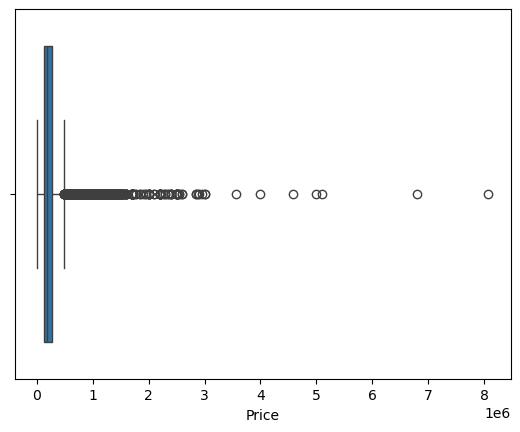

In [30]:
sns.boxplot(x=df['Price'])

<Axes: title={'center': 'Price'}, ylabel='Region'>

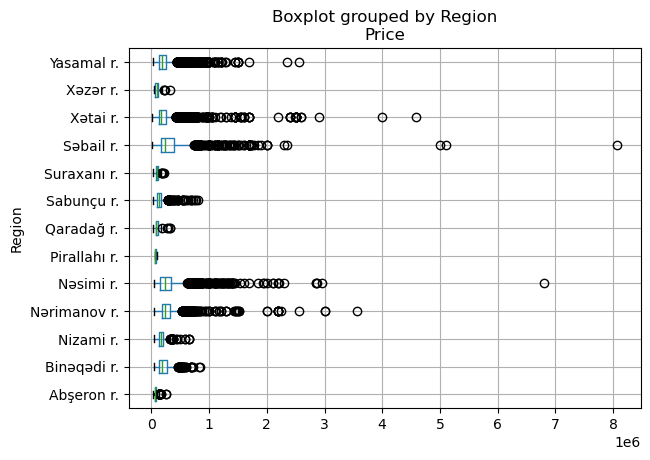

In [32]:
fig, ax = plt.subplots()
df.boxplot(column='Price', by='Region', ax=ax, vert=False)

We can see that there are outliers in our data with the help of the graph. Therefore, we will do our calculations with the median instead of the mean.

## Data Analysis and Data Visualization

Calculation of the median price of houses by region and the price per square meter.

In [34]:
total = df.groupby('Region')['Price'].median().round(2).reset_index()
total.sort_values(by='Price', ascending=False)

,Region,Price
9,Səbail r.,242000.0
3,Nərimanov r.,240000.0
4,Nəsimi r.,234000.0
1,Binəqədi r.,190000.0
12,Yasamal r.,180000.0
10,Xətai r.,170000.0
2,Nizami r.,160000.0
7,Sabunçu r.,126000.0
11,Xəzər r.,97500.0
8,Suraxanı r.,93000.0


In [36]:
square_price = df.groupby('Region')['Price'].median() / df.groupby('Region')['Square'].median()
square_price = round(square_price, 2)
square_price = square_price.reset_index()
square_price.columns = ['Region', 'Square_Price']
square_price = square_price.sort_values(by='Square_Price', ascending=False)
square_price

,Region,Square_Price
3,Nərimanov r.,2330.10
9,Səbail r.,2284.10
4,Nəsimi r.,2271.84
2,Nizami r.,2000.00
1,Binəqədi r.,1938.78
12,Yasamal r.,1894.74
10,Xətai r.,1888.89
7,Sabunçu r.,1575.00
8,Suraxanı r.,1328.57
11,Xəzər r.,1300.00


### Filtering and graphical comparison of houses near and outside the metro.

In [38]:
df_filter = df[df['Location'].str.endswith('m.')]
df_filter['Region'].unique()

array(['Binəqədi r.', 'Xətai r.', 'Yasamal r.', 'Nəsimi r.', 'Nizami r.',
       'Nərimanov r.', 'Səbail r.'], dtype=object)

In [40]:
df_normal = df[(~df['Location'].str.endswith('m.')) & (df['Region'].isin(['Binəqədi r.', 'Xətai r.', 'Yasamal r.', 'Nəsimi r.', 'Nizami r.',
       'Nərimanov r.', 'Səbail r.']))]

To properly compare the prices of houses near and outside the metro, we filter out only districts with a metro from the data.

In [42]:
near_metro = df_filter.groupby('Region')['Price'].median().round(2).reset_index()
near_metro

,Region,Price
0,Binəqədi r.,228000.0
1,Nizami r.,160000.0
2,Nərimanov r.,238000.0
3,Nəsimi r.,212000.0
4,Səbail r.,320000.0
5,Xətai r.,178000.0
6,Yasamal r.,186000.0


In [44]:
near_other = df_normal.groupby('Region')['Price'].median().round(2).reset_index()
near_other

,Region,Price
0,Binəqədi r.,145000.0
1,Nizami r.,165000.0
2,Nərimanov r.,247000.0
3,Nəsimi r.,283000.0
4,Səbail r.,200000.0
5,Xətai r.,150000.0
6,Yasamal r.,160000.0


In [46]:
merged = near_metro.merge(near_other, on='Region', suffixes=('_metro', '_other'))
merged = merged.sort_values(by='Price_metro', ascending=False)
near_metro_sorted = merged[['Region', 'Price_metro']].rename(columns={'Price_metro': 'Price'})
near_other_sorted = merged[['Region', 'Price_other']].rename(columns={'Price_other': 'Price'})

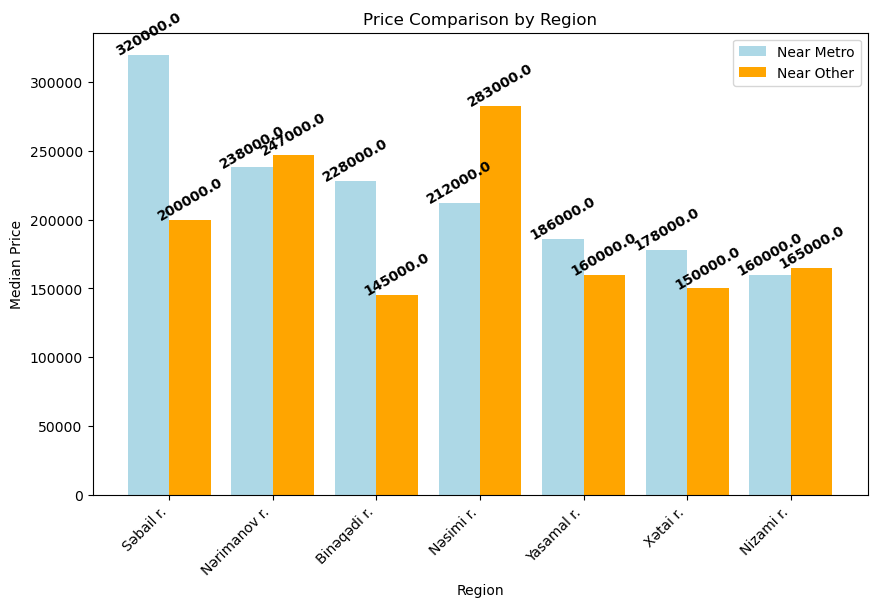

In [48]:
bar_width = 0.4
x = np.arange(len(near_metro['Region']))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - bar_width / 2, near_metro_sorted['Price'], width=bar_width, label='Near Metro', color=('#ADD8E6'))
ax.bar(x + bar_width / 2, near_other_sorted['Price'], width=bar_width, label='Near Other', color=('#FFA500'))


for i, v in enumerate(near_metro_sorted['Price']):
    plt.text(i - bar_width / 2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black', rotation=30)
for i, v in enumerate(near_other_sorted['Price']):
    plt.text(i + bar_width / 2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black', rotation=30)


ax.set_xticks(x)
ax.set_xticklabels(near_metro_sorted['Region'], rotation=45, ha="right")
ax.set_xlabel("Region")
ax.set_ylabel("Median Price")
ax.set_title("Price Comparison by Region")
ax.legend()
plt.show()

In [50]:
square_metro_price = df_filter.groupby('Region')['Price'].median() / df_filter.groupby('Region')['Square'].median()
square_metro_price = round(square_metro_price, 2)
square_metro_price = square_metro_price.reset_index()
square_metro_price.columns=['Region', 'Square_Price']
square_metro_price

,Region,Square_Price
0,Binəqədi r.,2130.84
1,Nizami r.,2000.00
2,Nərimanov r.,2321.95
3,Nəsimi r.,2231.58
4,Səbail r.,2909.09
5,Xətai r.,1934.78
6,Yasamal r.,1937.50


In [52]:
square_other_price = df_normal.groupby('Region')['Price'].median() / df_normal.groupby('Region')['Square'].median()
square_other_price = round(square_other_price, 2)
square_other_price = square_other_price.reset_index()
square_other_price.columns=['Region', 'Square_Price']
square_other_price

,Region,Square_Price
0,Binəqədi r.,1907.89
1,Nizami r.,1885.71
2,Nərimanov r.,2352.38
3,Nəsimi r.,2319.67
4,Səbail r.,1960.78
5,Xətai r.,1722.16
6,Yasamal r.,1758.24


In [54]:
merged_prices = square_metro_price.merge(square_other_price, on='Region', suffixes=('_metro', '_other'))
merged_prices = merged_prices.sort_values(by='Square_Price_metro', ascending=False)
square_metro_price_sorted = merged_prices[['Region', 'Square_Price_metro']].rename(columns={'Square_Price_metro': 'Square_Price'})
square_other_price_sorted = merged_prices[['Region', 'Square_Price_other']].rename(columns={'Square_Price_other': 'Square_Price'})

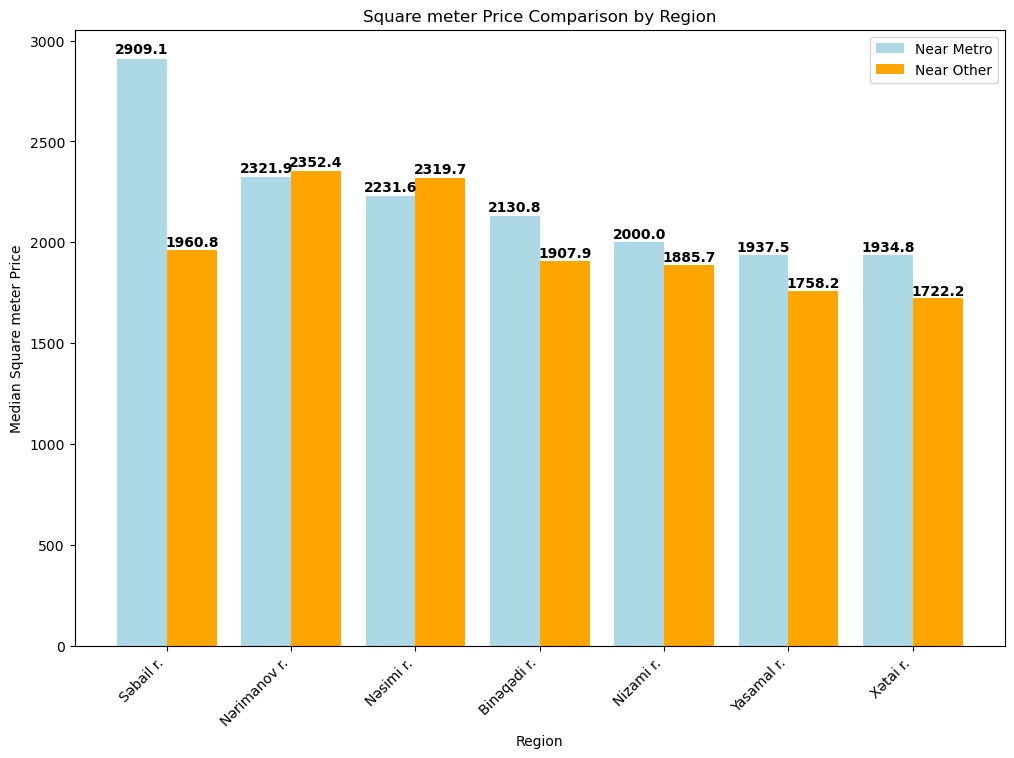

In [56]:
bar_width = 0.4
x = np.arange(len(square_metro_price['Region']))

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x - bar_width / 2, square_metro_price_sorted['Square_Price'], width=bar_width, label='Near Metro', color=('#ADD8E6'))
ax.bar(x + bar_width / 2, square_other_price_sorted['Square_Price'], width=bar_width, label='Near Other', color=('#FFA500'))


for i, v in enumerate(square_metro_price_sorted['Square_Price']):
    plt.text(i - bar_width / 2, v + (v * 0.01), f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')
for i, v in enumerate(square_other_price_sorted['Square_Price']):
    plt.text(i + bar_width / 2, v + (v * 0.01), f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')


ax.set_xticks(x)
ax.set_xticklabels(square_metro_price_sorted['Region'], rotation=45, ha="right")
ax.set_xlabel("Region")
ax.set_ylabel("Median Square meter Price")
ax.set_title("Square meter Price Comparison by Region")
ax.legend()
plt.show()

### Comparison of the price per square meter of new building and old building houses near and not near the metro

In [59]:
new_building_price_metro = df_filter[df_filter['Building_Type'] == 'New'].groupby('Region')['Price'].median() / df_filter[df_filter['Building_Type'] == 'New'].groupby('Region')['Square'].median()
new_building_price_metro = round(new_building_price_metro, 2)
new_building_price_metro = new_building_price_metro.reset_index()
new_building_price_metro.columns=['Region', 'Square_Price']
new_building_price_metro

,Region,Square_Price
0,Binəqədi r.,2173.91
1,Nizami r.,1889.47
2,Nərimanov r.,2359.65
3,Nəsimi r.,2144.00
4,Səbail r.,2914.29
5,Xətai r.,1900.00
6,Yasamal r.,1990.74


In [61]:
old_building_price_metro = df_filter[df_filter['Building_Type'] == 'Old'].groupby('Region')['Price'].median() / df_filter[df_filter['Building_Type'] == 'Old'].groupby('Region')['Square'].median()
old_building_price_metro = round(old_building_price_metro, 2)
old_building_price_metro = old_building_price_metro.reset_index()
old_building_price_metro.columns=['Region', 'Square_Price']
old_building_price_metro

,Region,Square_Price
0,Binəqədi r.,1893.33
1,Nizami r.,2000.00
2,Nərimanov r.,2384.62
3,Nəsimi r.,2066.67
4,Səbail r.,2777.78
5,Xətai r.,1852.94
6,Yasamal r.,2166.67


In [63]:
merged_building = new_building_price_metro.merge(old_building_price_metro, on='Region', suffixes=['_new', '_old'])
merged_building = merged_building.sort_values(by='Square_Price_new', ascending=False)
new_building_price_metro_sorted = merged_building[['Region', 'Square_Price_new']].rename(columns={'Square_Price_new': 'Square_Price'})
old_building_price_metro_sorted = merged_building[['Region', 'Square_Price_old']].rename(columns={'Square_Price_old': 'Square_Price'})

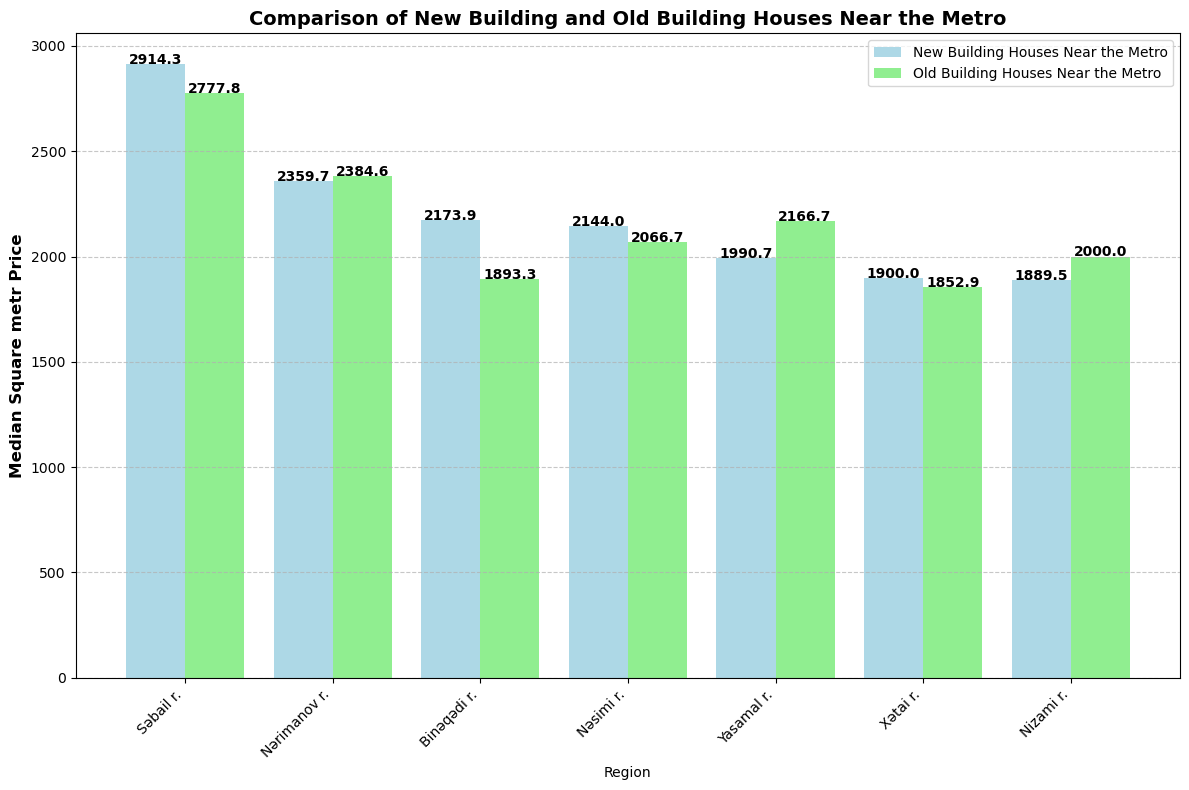

In [69]:
bar_width = 0.4

x = np.arange(len(new_building_price_metro_sorted['Region']))
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x - bar_width / 2, new_building_price_metro_sorted['Square_Price'], width=bar_width, label=('New Building Houses Near the Metro'), color=['#ADD8E6'])
ax.bar(x + bar_width / 2, old_building_price_metro_sorted['Square_Price'], width=bar_width, label=('Old Building Houses Near the Metro'), color=['#90EE90'])

for i, v in enumerate(new_building_price_metro_sorted['Square_Price']):
    plt.text(i - bar_width / 2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')

for i, v in enumerate(old_building_price_metro_sorted['Square_Price']):
    plt.text(i + bar_width / 2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')

ax.set_xticks(x)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(new_building_price_metro_sorted['Region'], rotation=45, ha="right")
ax.set_xlabel("Region")
ax.set_ylabel("Median Square metr Price", fontsize=12, fontweight='bold')
ax.set_title("Comparison of New Building and Old Building Houses Near the Metro", fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [105]:
new_building_price_other = df_normal[df_normal['Building_Type'] == 'New'].groupby('Region')['Price'].median() / df_normal[df_normal['Building_Type'] == 'New'].groupby('Region')['Square'].median()
new_building_price_other = round(new_building_price_other, 2)
new_building_price_other = new_building_price_other.reset_index()
new_building_price_other.columns=['Region', 'Square_Price']
new_building_price_other

,Region,Square_Price
0,Binəqədi r.,1875.00
1,Nizami r.,1762.38
2,Nərimanov r.,2336.36
3,Nəsimi r.,2328.12
4,Səbail r.,1902.65
5,Xətai r.,1870.00
6,Yasamal r.,1650.00


In [107]:
old_building_price_other = df_normal[df_normal['Building_Type'] == 'Old'].groupby('Region')['Price'].median() / df_normal[df_normal['Building_Type'] == 'Old'].groupby('Region')['Square'].median()
old_building_price_other = round(old_building_price_other, 2)
old_building_price_other = old_building_price_other.reset_index()
old_building_price_other.columns=['Region', 'Square_Price']
old_building_price_other

,Region,Square_Price
0,Binəqədi r.,1923.08
1,Nizami r.,1898.57
2,Nərimanov r.,2357.14
3,Nəsimi r.,2353.85
4,Səbail r.,1973.33
5,Xətai r.,1769.23
6,Yasamal r.,2142.86


In [109]:
merged_building_other = new_building_price_other.merge(old_building_price_other, on='Region', suffixes=['_new', '_old'])
merged_building_other = merged_building_other.sort_values(by='Square_Price_new', ascending=False)
new_building_price_other_sorted = merged_building_other[['Region', 'Square_Price_new']].rename(columns={'Square_Price_new': 'Square_Price'})
old_building_price_other_sorted = merged_building_other[['Region', 'Square_Price_old']].rename(columns={'Square_Price_old': 'Square_Price'})

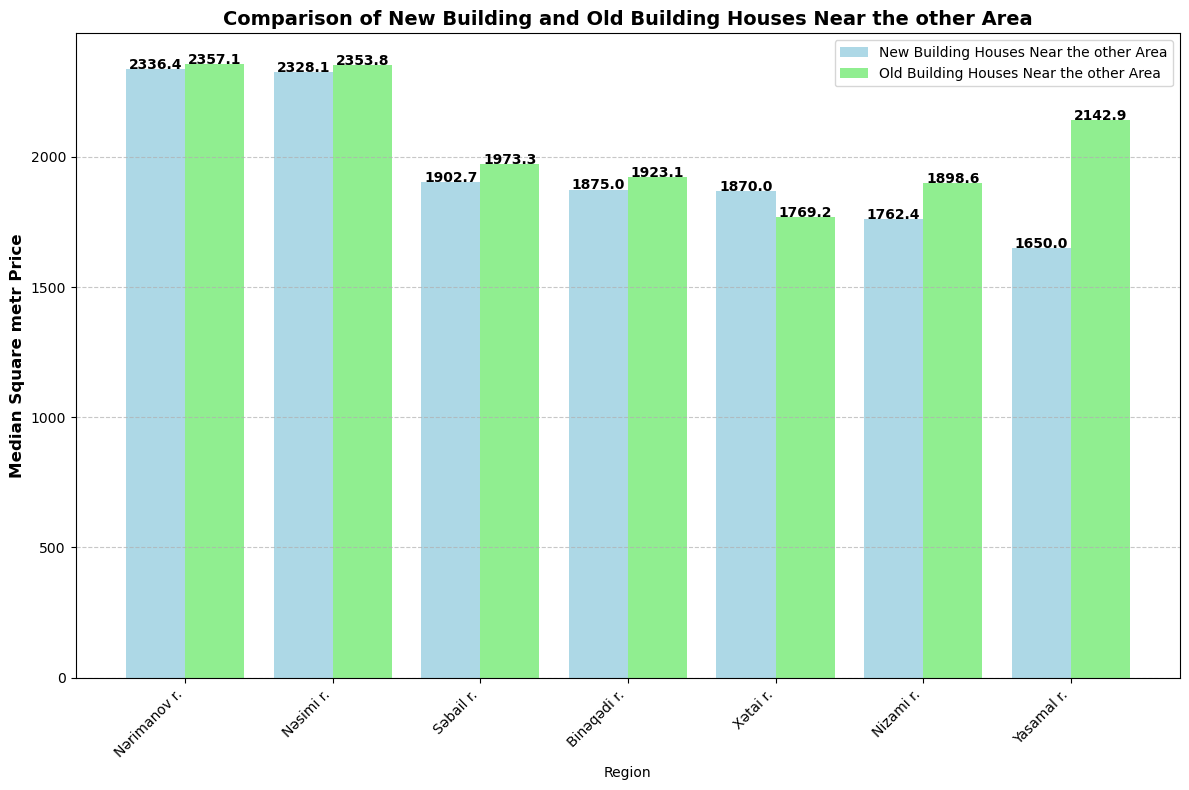

In [113]:
bar_width = 0.4

x = np.arange(len(new_building_price_other_sorted['Region']))
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x - bar_width / 2, new_building_price_other_sorted['Square_Price'], width=bar_width, label=('New Building Houses Near the other Area'), color=['#ADD8E6'])
ax.bar(x + bar_width / 2, old_building_price_other_sorted['Square_Price'], width=bar_width, label=('Old Building Houses Near the other Area'), color=['#90EE90'])

for i, v in enumerate(new_building_price_other_sorted['Square_Price']):
    plt.text(i - bar_width / 2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')

for i, v in enumerate(old_building_price_other_sorted['Square_Price']):
    plt.text(i + bar_width / 2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')

ax.set_xticks(x)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(new_building_price_other_sorted['Region'], rotation=45, ha="right")
ax.set_xlabel("Region")
ax.set_ylabel("Median Square metr Price", fontsize=12, fontweight='bold')
ax.set_title("Comparison of New Building and Old Building Houses Near the other Area", fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

### Comparison of the price per square meter of renovated and unrenovated houses near and not near the metro.

In [71]:
reno_price_metro = df_filter[df_filter['Renovation_Status'] == 'Yes'].groupby('Region')['Price'].median() / df_filter[df_filter['Renovation_Status'] == 'Yes'].groupby('Region')['Square'].median()
reno_price_metro = round(reno_price_metro, 2)
reno_price_metro = reno_price_metro.reset_index()
reno_price_metro.columns=['Region', 'Square_Price']
reno_price_metro

,Region,Square_Price
0,Binəqədi r.,2142.86
1,Nizami r.,2000.00
2,Nərimanov r.,2350.00
3,Nəsimi r.,2186.05
4,Səbail r.,2950.00
5,Xətai r.,1922.22
6,Yasamal r.,2055.56


In [73]:
not_reno_price_metro = df_filter[df_filter['Renovation_Status'] == 'No'].groupby('Region')['Price'].median() / df_filter[df_filter['Renovation_Status'] == 'No'].groupby('Region')['Square'].median()
not_reno_price_metro = round(not_reno_price_metro, 2)
not_reno_price_metro = not_reno_price_metro.reset_index()
not_reno_price_metro.columns=['Region', 'Square_Price']
not_reno_price_metro

,Region,Square_Price
0,Binəqədi r.,1786.52
1,Nizami r.,1678.89
2,Nərimanov r.,2057.37
3,Nəsimi r.,2087.72
4,Səbail r.,2791.67
5,Xətai r.,1777.95
6,Yasamal r.,1950.00


In [75]:
merged_metro = reno_price_metro.merge(not_reno_price_metro, on='Region', suffixes=['_reno', '_not_reno'])
merged_metro = merged_metro.sort_values(by='Square_Price_reno', ascending=False)
reno_price_metro_sorted = merged_metro[['Region', 'Square_Price_reno']].rename(columns={'Square_Price_reno': 'Square_Price'})
not_reno_price_metro_sorted = merged_metro[['Region', 'Square_Price_not_reno']].rename(columns={'Square_Price_not_reno': 'Square_Price'})

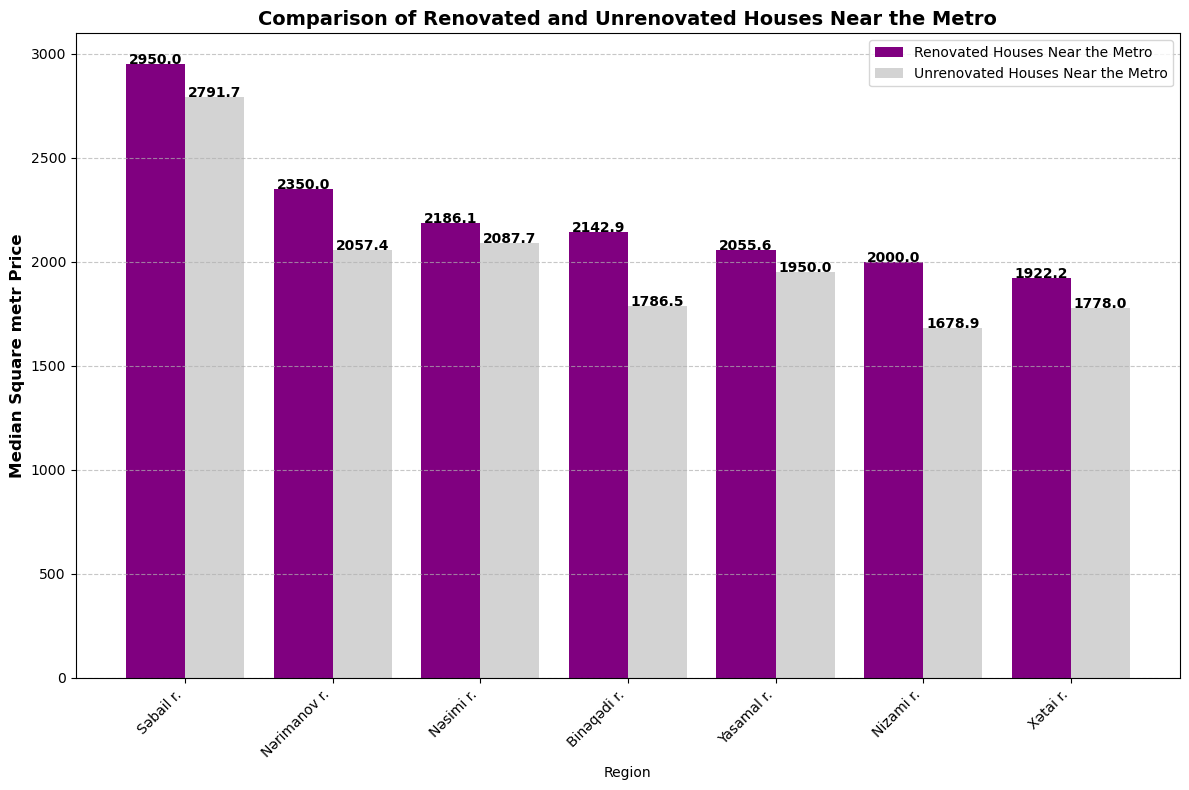

In [77]:
bar_width = 0.4

x = np.arange(len(reno_price_metro['Region']))
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x - bar_width / 2, reno_price_metro_sorted['Square_Price'], width=bar_width, label=('Renovated Houses Near the Metro'), color=['purple'])
ax.bar(x + bar_width / 2, not_reno_price_metro_sorted['Square_Price'], width=bar_width, label=('Unrenovated Houses Near the Metro'), color=['#D3D3D3'])

for i, v in enumerate(reno_price_metro_sorted['Square_Price']):
    plt.text(i - bar_width / 2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')

for i, v in enumerate(not_reno_price_metro_sorted['Square_Price']):
    plt.text(i + bar_width / 2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')

ax.set_xticks(x)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(reno_price_metro_sorted['Region'], rotation=45, ha="right")
ax.set_xlabel("Region")
ax.set_ylabel("Median Square metr Price", fontsize=12, fontweight='bold')
ax.set_title("Comparison of Renovated and Unrenovated Houses Near the Metro", fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [79]:
reno_price_other = df_normal[df_normal['Renovation_Status'] == 'Yes'].groupby('Region')['Price'].median() / df_normal[df_normal['Renovation_Status'] == 'Yes'].groupby('Region')['Square'].median()
reno_price_other = round(reno_price_other, 2)
reno_price_other = reno_price_other.reset_index()
reno_price_other.columns=['Region', 'Square_Price']
reno_price_other

,Region,Square_Price
0,Binəqədi r.,1907.89
1,Nizami r.,2000.00
2,Nərimanov r.,2440.00
3,Nəsimi r.,2368.42
4,Səbail r.,2021.39
5,Xətai r.,1750.00
6,Yasamal r.,1818.18


In [81]:
not_reno_price_other = df_normal[df_normal['Renovation_Status'] == 'No'].groupby('Region')['Price'].median() / df_normal[df_normal['Renovation_Status'] == 'No'].groupby('Region')['Square'].median()
not_reno_price_other = round(not_reno_price_other, 2)
not_reno_price_other = not_reno_price_other.reset_index()
not_reno_price_other.columns=['Region', 'Square_Price']
not_reno_price_other

,Region,Square_Price
0,Binəqədi r.,1509.43
1,Nizami r.,1470.59
2,Nərimanov r.,1875.00
3,Nəsimi r.,1955.92
4,Səbail r.,1504.79
5,Xətai r.,2384.62
6,Yasamal r.,1222.18


In [83]:
reno_merged = reno_price_other.merge(not_reno_price_other, on='Region', suffixes=['_reno', '_not_reno'])
reno_merged = reno_merged.sort_values(by='Square_Price_reno', ascending=False)
reno_price_other_sorted = reno_merged[['Region', 'Square_Price_reno']].rename(columns={'Square_Price_reno': 'Square_Price'})
not_reno_price_other_sorted = reno_merged[['Region', 'Square_Price_not_reno']].rename(columns={'Square_Price_not_reno': 'Square_Price'})

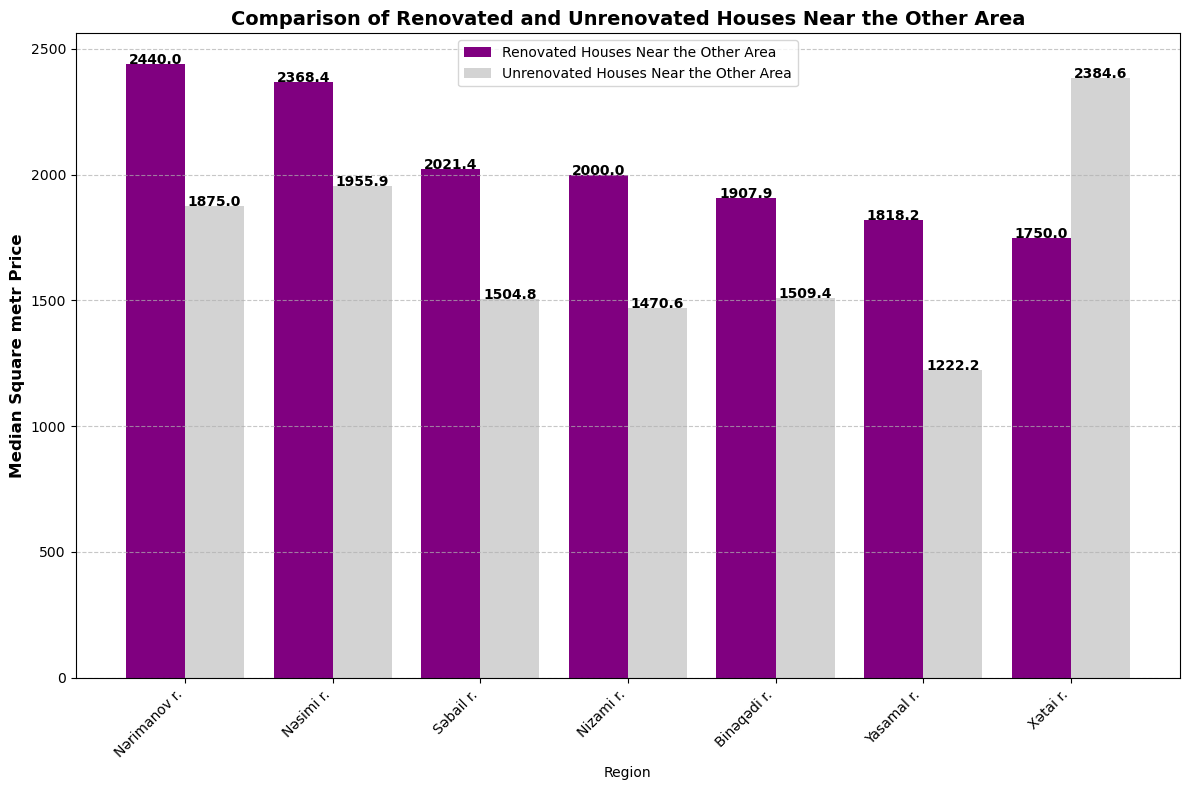

In [85]:
bar_width = 0.4
x = np.arange(len(reno_price_other_sorted['Region']))
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x - bar_width / 2, reno_price_other_sorted['Square_Price'], width = bar_width, label=('Renovated Houses Near the Other Area'), color=('purple'))
ax.bar(x + bar_width / 2, not_reno_price_other_sorted['Square_Price'], width = bar_width, label=('Unrenovated Houses Near the Other Area'), color=('#D3D3D3'))

for i, v in enumerate(reno_price_other_sorted['Square_Price']):
    plt.text(i - bar_width / 2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')
for i, v in enumerate(not_reno_price_other_sorted['Square_Price']):
    plt.text(i + bar_width / 2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')

ax.set_xticks(x)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(reno_price_other_sorted['Region'], rotation=45, ha="right")
ax.set_xlabel("Region")
ax.set_ylabel("Median Square metr Price", fontsize=12, fontweight='bold')
ax.set_title("Comparison of Renovated and Unrenovated Houses Near the Other Area", fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

### Comparison of the price per square meter of houses with and without property documents near and not near the metro.

In [87]:
prop_price_metro = df_filter[df_filter['Property_Deed'] == 'Yes'].groupby('Region')['Price'].median() / df_filter[df_filter['Property_Deed'] == 'Yes'].groupby('Region')['Square'].median()
prop_price_metro = round(prop_price_metro, 2)
prop_price_metro = prop_price_metro.reset_index()
prop_price_metro.columns=['Region', 'Square_Price']
prop_price_metro

,Region,Square_Price
0,Binəqədi r.,2090.91
1,Nizami r.,1937.50
2,Nərimanov r.,2305.00
3,Nəsimi r.,2250.00
4,Səbail r.,2900.00
5,Xətai r.,1873.68
6,Yasamal r.,1947.37


In [89]:
not_prop_price_metro = df_filter[df_filter['Property_Deed'] == 'No'].groupby('Region')['Price'].median() / df_filter[df_filter['Property_Deed'] == 'No'].groupby('Region')['Square'].median()
not_prop_price_metro = round(not_prop_price_metro, 2)
not_prop_price_metro = not_prop_price_metro.reset_index()
not_prop_price_metro.columns=['Region', 'Square_Price']
not_prop_price_metro

,Region,Square_Price
0,Binəqədi r.,2112.24
1,Nizami r.,2227.85
2,Nərimanov r.,2380.95
3,Nəsimi r.,2250.00
4,Səbail r.,2976.19
5,Xətai r.,2034.88
6,Yasamal r.,1882.35


In [91]:
prop_merged = prop_price_metro.merge(not_prop_price_metro, on='Region', suffixes=['_prop', '_not_prop'])
prop_merged = prop_merged.sort_values(by='Square_Price_prop', ascending=False)
prop_price_metro_sorted = prop_merged[['Region', 'Square_Price_prop']].rename(columns={'Square_Price_prop': 'Square_Price'})
not_prop_price_metro_sorted = prop_merged[['Region', 'Square_Price_not_prop']].rename(columns={'Square_Price_not_prop': 'Square_Price'})

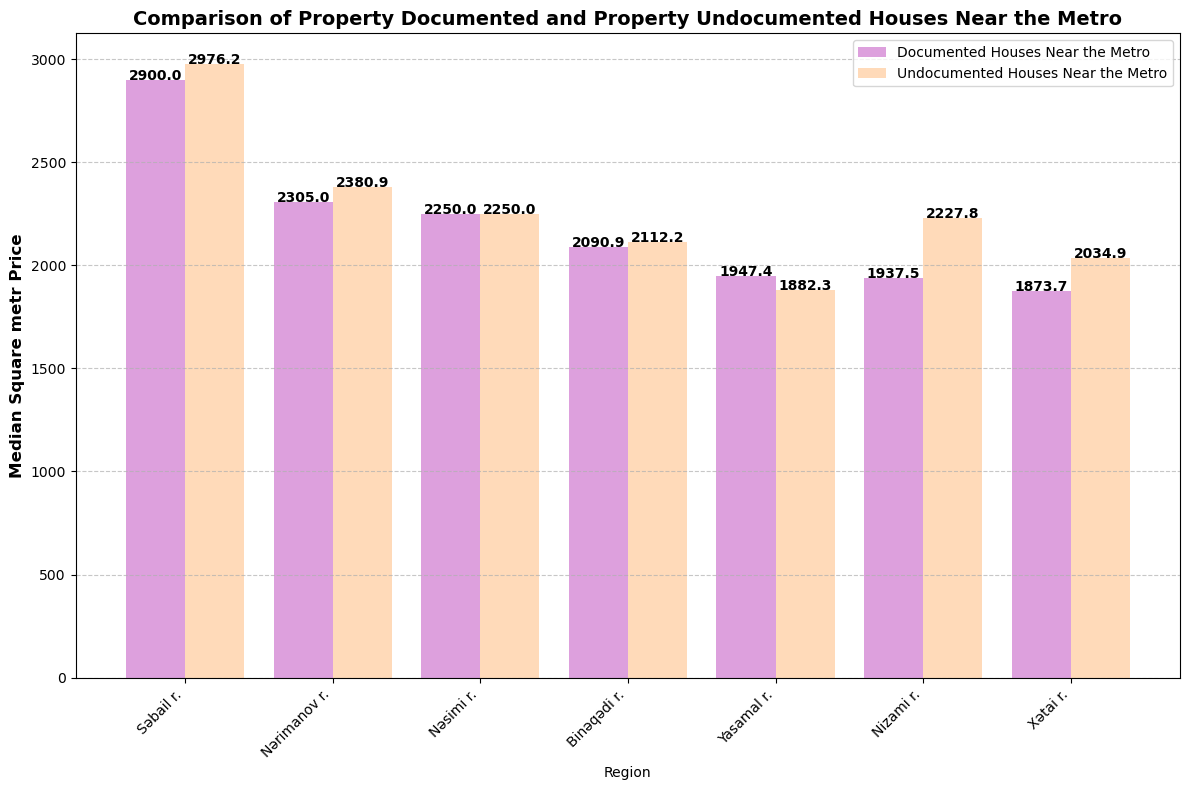

In [93]:
bar_width = 0.4
x = np.arange(len(prop_price_metro_sorted['Region']))
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x - bar_width / 2, prop_price_metro_sorted['Square_Price'], width = bar_width, label=('Documented Houses Near the Metro'), color=('#DDA0DD'))
ax.bar(x + bar_width / 2, not_prop_price_metro_sorted['Square_Price'], width = bar_width, label=('Undocumented Houses Near the Metro'), color=('#FFDAB9'))

for i, v in enumerate(prop_price_metro_sorted['Square_Price']):
    plt.text(i - bar_width / 2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')
for i, v in enumerate(not_prop_price_metro_sorted['Square_Price']):
    plt.text(i + bar_width / 2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')

ax.set_xticks(x)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(prop_price_metro_sorted['Region'], rotation=45, ha="right")
ax.set_xlabel("Region")
ax.set_ylabel("Median Square metr Price", fontsize=12, fontweight='bold')
ax.set_title("Comparison of Property Documented and Property Undocumented Houses Near the Metro", fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [95]:
prop_price_other = df_normal[df_normal['Property_Deed'] == 'Yes'].groupby('Region')['Price'].median() / df_normal[df_normal['Property_Deed'] == 'Yes'].groupby('Region')['Square'].median()
prop_price_other = round(prop_price_other, 2)
prop_price_other = prop_price_other.reset_index()
prop_price_other.columns=['Region', 'Square_Price']
prop_price_other

,Region,Square_Price
0,Binəqədi r.,1893.33
1,Nizami r.,1976.47
2,Nərimanov r.,2307.69
3,Nəsimi r.,2354.33
4,Səbail r.,2000.00
5,Xətai r.,1750.00
6,Yasamal r.,1860.47


In [97]:
not_prop_price_other = df_normal[df_normal['Property_Deed'] == 'No'].groupby('Region')['Price'].median() / df_normal[df_normal['Property_Deed'] == 'No'].groupby('Region')['Square'].median()
not_prop_price_other = round(not_prop_price_other, 2)
not_prop_price_other = not_prop_price_other.reset_index()
not_prop_price_other.columns=['Region', 'Square_Price']
not_prop_price_other

,Region,Square_Price
0,Binəqədi r.,2142.21
1,Nizami r.,1793.48
2,Nərimanov r.,2142.86
3,Nəsimi r.,2238.10
4,Səbail r.,1830.28
5,Xətai r.,2131.58
6,Yasamal r.,1400.00


In [99]:
prop_other = prop_price_other.merge(not_prop_price_other, on='Region', suffixes=['_prop', '_not_prop'])
prop_other = prop_other.sort_values(by='Square_Price_prop', ascending=False)
prop_price_other_sorted = prop_other[['Region', 'Square_Price_prop']].rename(columns={'Square_Price_prop': 'Square_Price'})
not_prop_price_other_sorted = prop_other[['Region', 'Square_Price_not_prop']].rename(columns={'Square_Price_not_prop': 'Square_Price'})

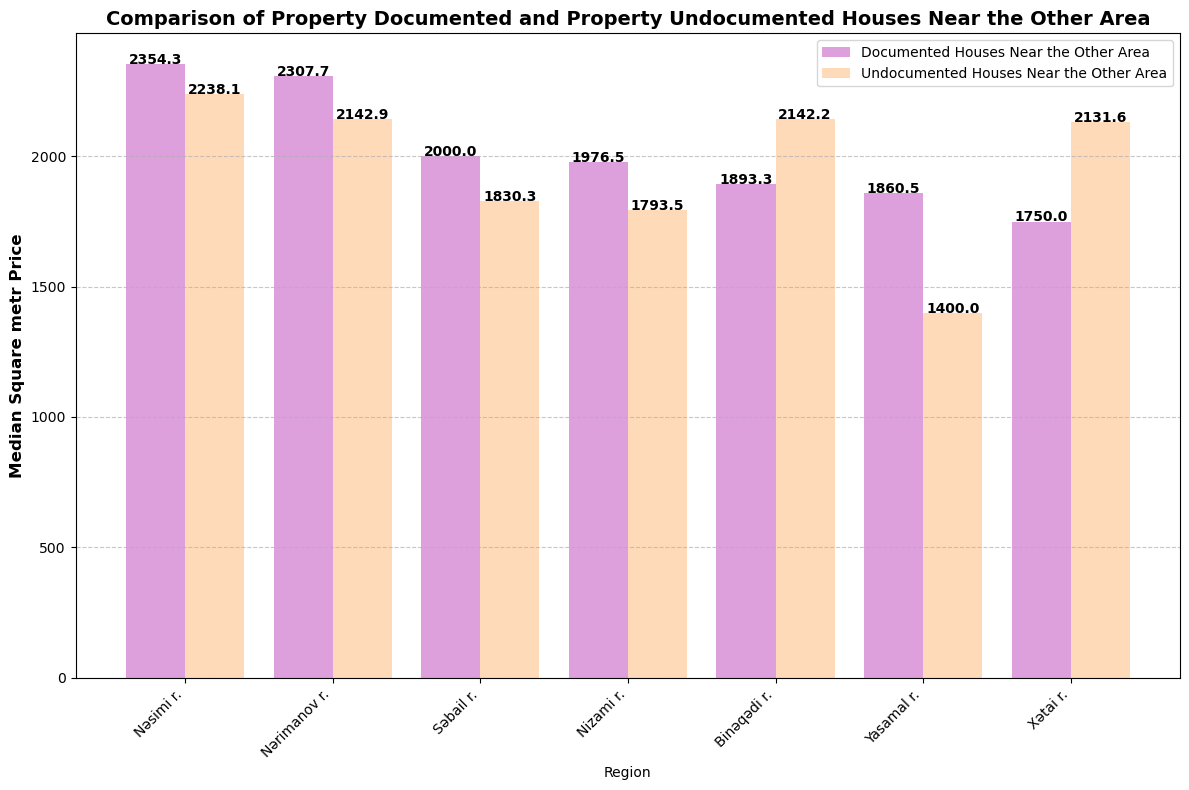

In [101]:
bar_width = 0.4
x = np.arange(len(prop_price_other_sorted['Region']))
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x - bar_width / 2, prop_price_other_sorted['Square_Price'], width = bar_width, label=('Documented Houses Near the Other Area'), color=('#DDA0DD'))
ax.bar(x + bar_width / 2, not_prop_price_other_sorted['Square_Price'], width = bar_width, label=('Undocumented Houses Near the Other Area'), color=('#FFDAB9'))

for i, v in enumerate(prop_price_other_sorted['Square_Price']):
    plt.text(i - bar_width / 2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')
for i, v in enumerate(not_prop_price_other_sorted['Square_Price']):
    plt.text(i + bar_width / 2, v + 0.1, f"{v:.1f}", ha='center', fontsize=10, fontweight='bold', color='black')

ax.set_xticks(x)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(prop_price_other_sorted['Region'], rotation=45, ha="right")
ax.set_xlabel("Region")
ax.set_ylabel("Median Square metr Price", fontsize=12, fontweight='bold')
ax.set_title("Comparison of Property Documented and Property Undocumented Houses Near the Other Area", fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

## Conclusion

In this analysis, I mainly conducted an analysis on the districts with metros.
According to the analysis I did, the price of houses in Baku is mostly based on the principles we know. For example, houses near the metro are more expensive than others, renovated houses are more expensive than houses without renovation.
But I also obtained some different results in the analysis. For example, houses in old buildings outside the metro are mostly more expensive than houses in new buildings, and undocumented houses in houses outside the metro are more expensive than documented houses.
In general, according to the results, citizens with a low budget are more suitable to buy a house in Qaradağ, Abşeron, Pirallahı regions. Citizens with an average budget are more suitable to buy a house in Xətai, Binəqədi regions. Citizens with a high budget who want to buy a house close to the city and metro are more suitable to buy a house in Səbail, Nərimanov, Nəsimi regions.
As can be seen from the analysis, the price of houses in Baku varies depending on known normal factors and some different factors. But in general, like other capitals and large cities, the price of houses in Baku depends on location, proximity to the metro, and state of repair.